# 2025.04.15
## Data Analysis for Wine Quality Rating prediction

In [14]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 데이터 읽어오기
red_df = pd.read_csv('./wine_data/winequality-red.csv', sep = ';', header=0)
white_df = pd.read_csv('./wine_data/winequality-white.csv', sep = ';', header=0)

In [16]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# comma separated file
red_df.to_csv('./wine_data/red.csv', index=False)
white_df.to_csv('./wine_data/white.csv', index=False)

In [18]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [20]:
# red와 white 데이터프레임 병합
red_df.insert(0, column= 'type', value='red')

In [21]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
red_df.shape

(1599, 13)

In [23]:
white_df.insert(0, column= 'type', value='white')

In [24]:
white_df.shape

(4898, 13)

In [25]:
wine_df = pd.concat([red_df, white_df])

In [26]:
wine_df.shape

(6497, 13)

In [27]:
wine_df.to_csv('./wine_data/wine.csv', index=False)

In [28]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [29]:
# 컬럼 네임 변경(빈킨 삭제, 한글=>영어)
wine_df.columns = wine_df.columns.str.replace(' ', '_')

In [30]:
wine_df.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [31]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [32]:
# quality data
sorted(wine_df.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [33]:
wine_df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

## 시각화
### Q1. quality 에 대해 히스토그램
### Q2. 'fixed_acidity', 'citrric_acid', 
###        'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
###        'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 
###         2행 5열 boxplot 그래프 그리기(subplot 이용)
### Q3. Quality와 fixed_acidity에 대해 type별로 scatter plot 그리기
### (red=>빨간 동그라미, white=>파랑 세모)

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

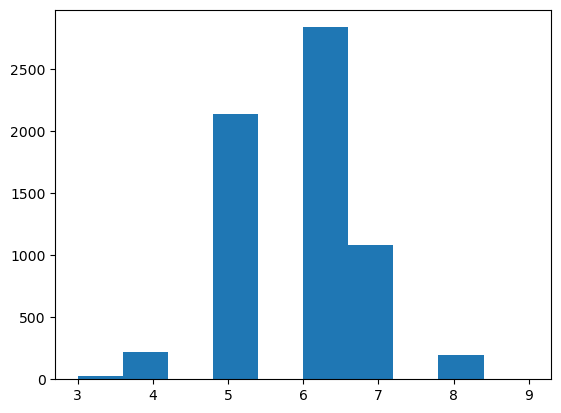

In [34]:
# Q1
plt.hist(wine_df.quality, bins=10)

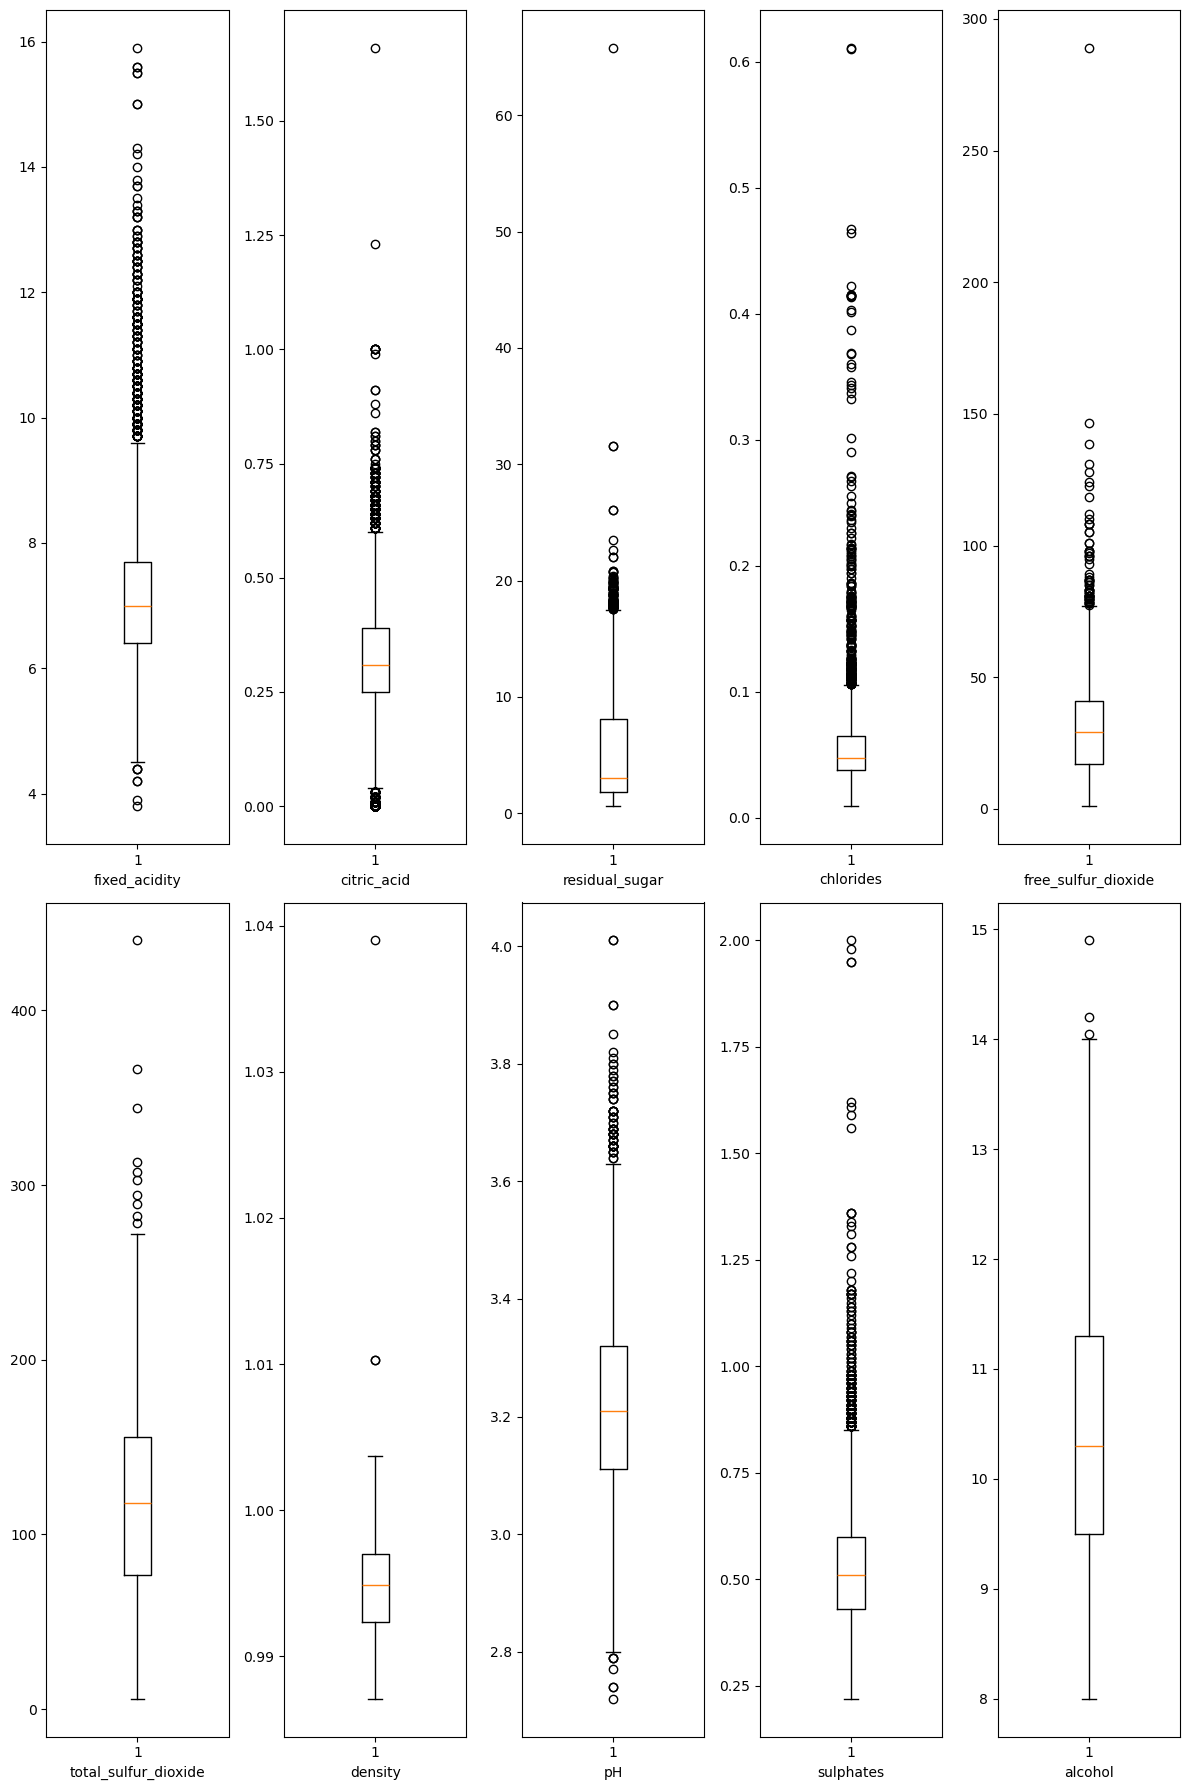

In [43]:
# Q2
variables = ['fixed_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
             'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
             'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(2, 5, figsize=(12, 18))

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    plt.subplot(2, 5, i+1)
    plt.boxplot(wine_df[var])
    plt.xlabel(var)

plt.tight_layout()
plt.show()

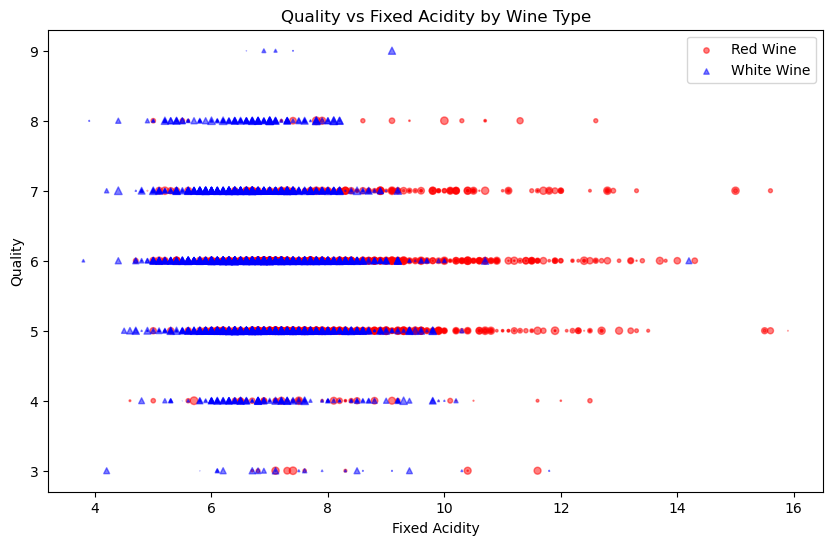

In [49]:
# Q3
N = len(wine_df) 

red_wine = wine_df[wine_df['type'] == 'red']
white_wine = wine_df[wine_df['type'] == 'white']

red_area = (30 * np.random.rand(len(red_wine))**2)  
white_area = (30 * np.random.rand(len(white_wine))**2)

plt.figure(figsize=(10, 6))
plt.scatter(red_wine['fixed_acidity'], red_wine['quality'], s=red_area, color='red', marker='o', alpha=0.5, label='Red Wine')
plt.scatter(white_wine['fixed_acidity'], white_wine['quality'], s=white_area, color='blue', marker='^', alpha=0.5, label='White Wine')

plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.title('Quality vs Fixed Acidity by Wine Type')
plt.legend()
plt.show()